 # Visualise debug 
 This script visualises the debug numpy arrays that contain the deformation of the initial sphere for 1 object.

In [39]:
import numpy as np
import os
import object_reconstruction.data.checkpoints as checkpoints
import object_reconstruction.data.touch_charts as touch_charts
import object_reconstruction.data.obj_pointcloud as obj_pointcloud
from object_reconstruction.utils.mesh_utils import *
from IPython.display import IFrame
import plotly.graph_objects as go
import trimesh
import open3d as o3d
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Load files
checkpoint_id = '30_09_1940'
object_id = '102408'

results_dir = os.path.join(os.path.dirname(checkpoints.__file__), 'deformation_model', checkpoint_id)
results_path = os.path.join(results_dir, f'debug_visualisation_{checkpoint_id}.npy')
results = np.load(results_path, allow_pickle=True)

sphere_faces_path = os.path.join(os.path.dirname(touch_charts.__file__), 'vision_charts.obj')
sphere_verts, sphere_faces = load_mesh_touch(sphere_faces_path)
sphere_faces = sphere_faces.cpu().numpy()

pointcloud_gt_path = os.path.join(os.path.dirname(obj_pointcloud.__file__), object_id, 'obj_pointcloud.npy')
pointcloud_gt = np.load(pointcloud_gt_path, allow_pickle=True)

In [3]:
idx_id = 49
for idx, res in enumerate(results):
    if idx == idx_id:
        res = res[:1824, :]
        scene = trimesh.scene.Scene(geometry=trimesh.Trimesh(res, sphere_faces))
        scene.show(viewer='notebook')
    

/Users/ri21540/miniforge3/envs/active_touch/lib/python3.8/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Point cloud object:

In [31]:
x_min = np.amin(pointcloud_gt[:, 0])
x_max = np.amax(pointcloud_gt[:, 0])
y_min = np.amin(pointcloud_gt[:, 1])
y_max = np.amax(pointcloud_gt[:, 1])
z_min = np.amin(pointcloud_gt[:, 2])
z_max = np.amax(pointcloud_gt[:, 2])

print(f'Boundaries ground truth: \nX; [{round(x_min, 4)}, {round(x_max, 4)}]')
print(f'Boundaries ground truth: \nX; [{round(y_min, 4)}, {round(y_max, 4)}]')
print(f'Boundaries ground truth: \nX; [{round(z_min, 4)}, {round(z_max, 4)}]')

# Plot ground truth
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.set(xlim3d=(-0.08, 0.08), xlabel='X')
ax.set(ylim3d=(-0.08, 0.08), ylabel='Y')
ax.set(zlim3d=(-0.08, 0.08), zlabel='Z')
scatters = ax.scatter(pointcloud_gt[:, 0], pointcloud_gt[:, 1], pointcloud_gt[:, 2], s=4)
#scatters = ax.scatter(results[0][:1824, 2], results[0][:1824, 0], results[0][:1824, 1], s=4)
plt.show()

Boundaries ground truth: 
X; [-0.0798, 0.0794]
Boundaries ground truth: 
X; [-0.0672, 0.0488]
Boundaries ground truth: 
X; [-0.0456, 0.0489]


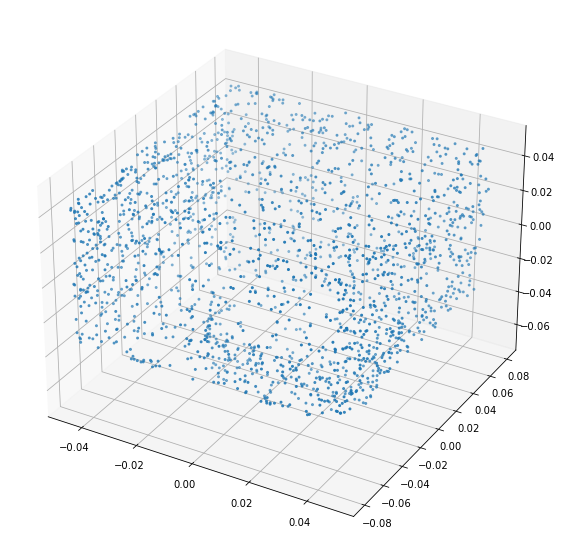

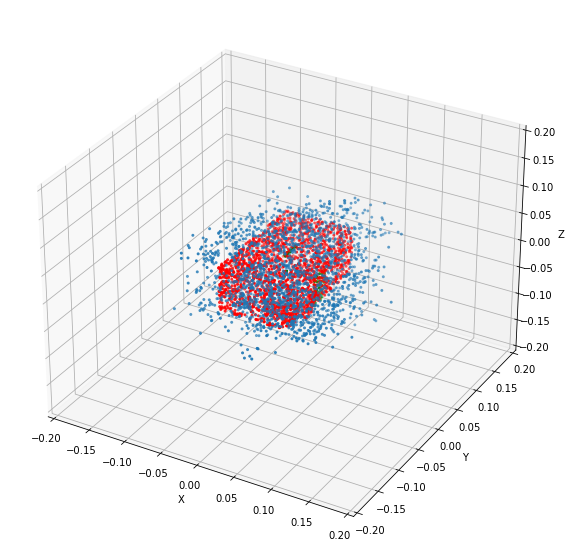

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Plot ground truth
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# Create plots
scatters = ax.scatter(pointcloud_gt[:, 2], pointcloud_gt[:, 0], pointcloud_gt[:, 1], s=4)
plt.show()

# Settings
plot_without_gt = False
plot_with_gt = True
save = True
num_steps = results.shape[0]

if plot_without_gt:
    def animate_scatters(iteration, data, scatters):
        """
        Update the data held by the scatter plot and therefore animates it.
        Args:
            iteration (int): Current iteration of the animation
            data (list): List of the data positions at each iteration.
            scatters (list): List of all the scatters (One per element)
        Returns:
            list: List of scatters (One per element) with new coordinates
        """
        scatters._offsets3d = (data[iteration][:1824,0], data[iteration][:1824,1], data[iteration][:1824,2])
        return scatters

    # Attaching 3D axis to the figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")
    # Create plots
    scatters = ax.scatter(results[0][:1824, 2], results[0][:1824, 0], results[0][:1824, 1], s=4)
    # Setting the axes properties
    ax.set(xlim3d=(-0.1, 0.1), xlabel='X')
    ax.set(ylim3d=(-0.1, 0.1), ylabel='Y')
    ax.set(zlim3d=(-0.1, 0.1), zlabel='Z')
    
    # Creating the Animation object
    anim = animation.FuncAnimation(
        fig, animate_scatters, num_steps, fargs=(results, scatters), interval=100)
    HTML(anim.to_html5_video())
    if save:
        # Save file
        save_path = os.path.join(results_dir, 'deformation.mp4')
        writermp4 = animation.FFMpegWriter(fps=30) 
        anim.save(save_path, writer=writermp4) 
        
if plot_with_gt:

    def animate_scatters_gt(iteration, data, scatters, scatters_gt, scatters_touches):
        """
        Update the data held by the scatter plot and therefore animates it.
        Args:
            iteration (int): Current iteration of the animation
            data (list): List of the data positions at each iteration.
            scatters (list): List of all the scatters (One per element)
        Returns:
            list: List of scatters (One per element) with new coordinates
        """
        scatters._offsets3d = (data[iteration][:1824,2], data[iteration][:1824,0], data[iteration][:1824,1])
        scatters_touches._offsets3d = (data[iteration][1824:,2], data[iteration][1824:,0], data[iteration][1824:,1])
        return scatters, scatters_gt, scatters_touches

    # Attaching 3D axis to the figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")

    # Create plots
    scatters = ax.scatter(results[0][:1824, 2], results[0][:1824, 0], results[0][:1824, 1], s=4)
    scatters_gt = ax.scatter(pointcloud_gt[:, 2], pointcloud_gt[:, 0], pointcloud_gt[:, 1], s=4, c='red')
    scatters_touches = ax.scatter(results[0][1824:, 2], results[0][1824:, 0], results[0][1824:, 1], s=4, c='green')

    # Setting the axes properties
    ax.set(xlim3d=(-0.2, 0.2), xlabel='X')
    ax.set(ylim3d=(-0.2, 0.2), ylabel='Y')
    ax.set(zlim3d=(-0.2, 0.2), zlabel='Z')

    # Creating the Animation object
    anim_gt = animation.FuncAnimation(
        fig, animate_scatters_gt, num_steps, fargs=(results, scatters, scatters_gt, scatters_touches), interval=100)
    HTML(anim_gt.to_html5_video())
    if save:
        # Save file
        save_path = os.path.join(results_dir, 'deformation_gt.mp4')
        writermp4 = animation.FFMpegWriter(fps=30) 
        anim_gt.save(save_path, writer=writermp4)


## Mesh from resulting pointcloud

In [42]:
import meshplot as mp

# Load files
checkpoint_id = '30_09_1940'
object_id = '102408'

results_dir = os.path.join(os.path.dirname(checkpoints.__file__), 'deformation_model', checkpoint_id)
results_path = os.path.join(results_dir, f'debug_visualisation_{checkpoint_id}.npy')
results = np.load(results_path, allow_pickle=True)

sphere_faces_path = os.path.join(os.path.dirname(touch_charts.__file__), 'vision_charts.obj')
sphere_verts, sphere_faces = load_mesh_touch(sphere_faces_path)
sphere_faces = sphere_faces.cpu().numpy()

pointcloud_gt_path = os.path.join(os.path.dirname(obj_pointcloud.__file__), object_id, 'obj_pointcloud.npy')
pointcloud_gt = np.load(pointcloud_gt_path, allow_pickle=True)

/Users/ri21540/miniforge3/envs/active_touch/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:530: UserWarning:

No mtl file provided



In [48]:
new_faces = np.load(os.path.join(os.path.dirname(touch_charts.__file__), 'new_faces.npy'))
shading = {"wireframe":True, "wire_width": 0.03, "wire_color": "black"}
idx = 10
mp.plot(results[idx], new_faces, c=results[idx][:, 1], shading=shading)
mp.plot(results[idx], sphere_faces, c=results[idx][:, 1], shading=shading)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.010771…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.010771…

Point cloud:

In [19]:
x = results[-1][:, 0]
y = results[-1][:, 1]
z = results[-1][:, 2]
# 3D plot (Plotly), except the points ([0, 0, 0])
fig = go.Figure(
    [go.Scatter3d(x=x, y=y,z=z, mode='markers',
        marker=dict(
            size=1
            )
    )]
)
fig.show()